# Logistic Regression 

### About dataset

#### Demographic:
• Sex: male or female(Nominal)\
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)\
#### Behavioral:
• Current Smoker: whether or not the patient is a current smoker (Nominal)\
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
#### Medical( history):
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)\
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)\
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)\
• Diabetes: whether or not the patient had diabetes (Nominal)
#### Medical(current)
• Tot Chol: total cholesterol level (Continuous)\
• Sys BP: systolic blood pressure (Continuous)\
• Dia BP: diastolic blood pressure (Continuous)\
• BMI: Body Mass Index (Continuous)\
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)\
• Glucose: glucose level (Continuous)\
Predict variable (desired target)\
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)\

#### Import packages and load dataset

In [1]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import statistics

%matplotlib inline
np.random.seed(42)

In [2]:
# import dataset, remove na

heart = pd.read_csv('heart.csv')
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# info of dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


#### Descriptive statistics

In [4]:
# descriptive statistics
heart.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,3656.0,0.443654,0.496883,0.00,0.00,0.00,1.00,1.0
age,3656.0,49.557440,8.561133,32.00,42.00,49.00,56.00,70.0
education,3656.0,1.979759,1.022657,1.00,1.00,2.00,3.00,4.0
currentSmoker,3656.0,0.489059,0.499949,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3656.0,9.022155,11.918869,0.00,0.00,0.00,20.00,70.0
BPMeds,3656.0,0.030361,0.171602,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3656.0,0.005744,0.075581,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3656.0,0.311543,0.463187,0.00,0.00,0.00,1.00,1.0
diabetes,3656.0,0.027079,0.162335,0.00,0.00,0.00,0.00,1.0
totChol,3656.0,236.873085,44.096223,113.00,206.00,234.00,263.25,600.0


#### Set independent and dependent variable

In [5]:
# create independent and dependent variable
# independent variables is choosen based on p< 0.05
x = heart[['male','age','cigsPerDay','totChol','sysBP','glucose']]
x = sm.add_constant(x)
y = heart['TenYearCHD']

#### Logistic Regression Model using statsmodels

In [6]:
# statsmodels logistic regression
LogisticRegr = sm.Logit(y,x)
res = LogisticRegr.fit(method = 'newton')
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.377800
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                            6
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.1147
Time:                        15:27:20   Log-Likelihood:                -1381.2
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.885e-74
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1298      0.476    -19.199      0.000     -10.062      -8.198
male           0.5614      0.

In [8]:
# parameter for logit function
res.params

const        -9.129843
male          0.561446
age           0.065896
cigsPerDay    0.019226
totChol       0.002272
sysBP         0.017534
glucose       0.007280
dtype: float64

#### Odds ratio and confidence interval for odds ratio

In [9]:
# odds ratio is the natural e to the power of parameter
odds_ratio = np.exp(res.params)

# confidence level for odds ratio
confidence_interval = np.exp(res.conf_int())

# p-value for every parameter
pvalue = res.pvalues

# odds ratio, confidence interval, and p-values
table= confidence_interval
table['Odds Ratio'] = odds_ratio
table['p-value'] = round(pvalue,4)
table.columns = ['Lower 95%', 'Upper 95%','Odds Ratio','p-value']
print(table)

            Lower 95%  Upper 95%  Odds Ratio  p-value
const        0.000043   0.000275    0.000108    0.000
male         1.421955   2.161623    1.753206    0.000
age          1.054747   1.081654    1.068116    0.000
cigsPerDay   1.011102   1.027789    1.019412    0.000
totChol      1.000072   1.004483    1.002275    0.043
sysBP        1.013411   1.021985    1.017689    0.000
glucose      1.004002   1.010623    1.007307    0.000


In [10]:
# meaning behind the odds ratio

print(f'''
Our logistic regression shows that, holding all other independent variables constant, the odds of getting 
heart disease for men is higher than women. 
In terms of odds, the odds of getting heart disease for men compared to women is {np.exp(res.params.male)}. 
In terms of percentage, the odds of getting heart disease for men is 75% higher than women.
      ''')

print(f'''
Our logistic regression shows that, holding all other independent variables constant, the odds increase 
{np.exp(res.params.age)} for one year increase in patient age. In percetage terms, the odds of getting heart 
disease increase 6.8% for one year increase in patient age.
''')

print(f'''
Similarly, the logistic regression shows that one increase in cigarette smoke per day increase the odds of 
getting heart disease by {np.exp(res.params.cigsPerDay)}.  In terms of percentage, one increase in cigarretes
smoke a day will increase the odds of getting heart disease by 1.9%.
''')


Our logistic regression shows that, holding all other independent variables constant, the odds of getting 
heart disease for men is higher than women. 
In terms of odds, the odds of getting heart disease for men compared to women is 1.753205853408318. 
In terms of percentage, the odds of getting heart disease for men is 75% higher than women.
      

Our logistic regression shows that, holding all other independent variables constant, the odds increase 
1.068116100510157 for one year increase in patient age. In percetage terms, the odds of getting heart 
disease increase 6.8% for one year increase in patient age.


Similarly, the logistic regression shows that one increase in cigarette smoke per day increase the odds of 
getting heart disease by 1.0194115197693918.  In terms of percentage, one increase in cigarretes
smoke a day will increase the odds of getting heart disease by 1.9%.



#### Evaluate the model

In [11]:
# calculate the number of people with ten years CHD risk according to our model 
probability = res.predict()
print(probability[probability >= 0.5])
len(probability[probability >= 0.5])

[0.56134529 0.55960543 0.50859264 0.55387512 0.58048589 0.51886731
 0.51813488 0.79324852 0.50853599 0.54079448 0.59920065 0.58577045
 0.52309968 0.61139352 0.66203125 0.62478126 0.58220891 0.61524784
 0.51962018 0.51422102 0.61656529 0.5541471  0.59281112 0.70757974
 0.52362637 0.51524505 0.59734716 0.51439662 0.50760114 0.65365709
 0.61269536 0.54016299 0.61480394 0.56222264 0.55426007 0.52084928
 0.63986658 0.64081429 0.54021349 0.51771728 0.50918182 0.54561564
 0.52965089 0.61097418 0.53345078 0.7306496  0.72492537 0.5265812
 0.91827203 0.58384879 0.62566671 0.52097902 0.63225865 0.51282764
 0.67679351 0.50656989 0.61660907 0.93103397 0.75936343 0.86666403
 0.62641203 0.62353403 0.70319604 0.53968005 0.58668202]


65

In [12]:
# calculate the true count of patient with ten years CHD risk
print( 'The number of patient with 10 year risk of coronary heart disease :', len(heart[heart['TenYearCHD'] == 1]))
print( 'The number of patient with no 10 year risk of coronary heart disease :', len(heart[heart['TenYearCHD'] == 0]))

# use value_counts() to get the total number of positive and negative risk
print(heart.TenYearCHD.value_counts())


The number of patient with 10 year risk of coronary heart disease : 557
The number of patient with no 10 year risk of coronary heart disease : 3099
0    3099
1     557
Name: TenYearCHD, dtype: int64


In [13]:
heart['model_probability'] = res.predict()
predict = []
for i in heart['model_probability']:
    if i >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
heart['model_prediction'] = predict

In [14]:
# view all postive patient according to the model
heart[heart['model_prediction'] == 1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,model_probability,model_prediction
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1,0.561345,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0,0.559605,1
153,0,66,1.0,0,0.0,0.0,0,1,0,214.0,212.0,104.0,25.32,57.0,84.0,1,0.508593,1
249,0,60,1.0,1,20.0,0.0,0,0,1,180.0,200.0,122.5,44.27,88.0,150.0,0,0.553875,1
369,0,67,1.0,0,0.0,0.0,0,1,0,248.0,215.0,105.0,22.91,90.0,97.0,1,0.580486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,1,66,3.0,0,0.0,0.0,0,1,0,226.0,213.0,133.0,25.29,100.0,67.0,0,0.626412,1
4075,1,63,4.0,1,25.0,0.0,0,1,0,203.0,192.5,125.0,26.18,80.0,83.0,1,0.623534,1
4076,0,61,1.0,0,0.0,1.0,0,1,1,265.0,200.0,125.0,29.50,68.0,256.0,1,0.703196,1
4084,0,54,1.0,0,0.0,0.0,0,1,1,326.0,187.0,95.0,29.94,67.0,235.0,0,0.539680,1


Text(0.5, 1.0, 'Accuracy Score: 0.8528446389496718')

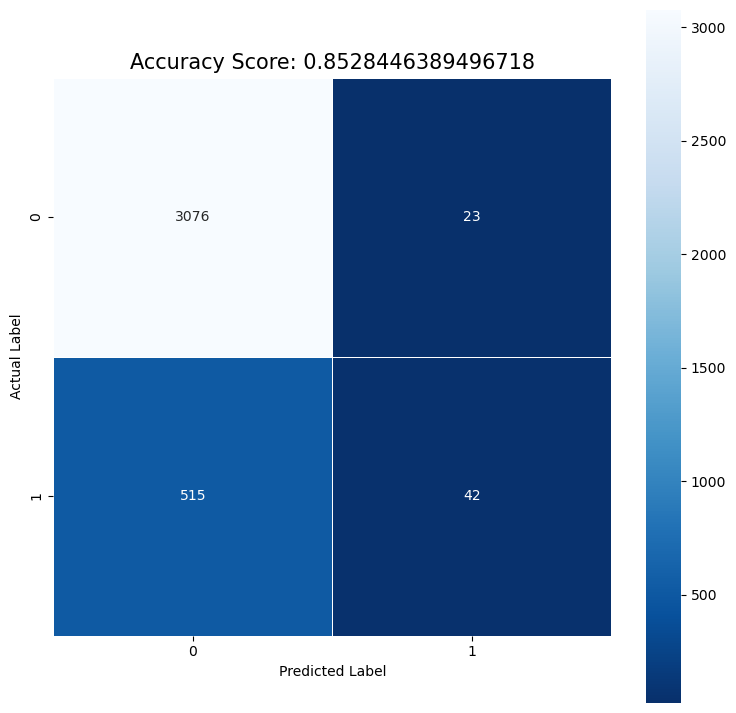

In [16]:
# accuracy score of logistic regression model 
# make confusion matrix using seaborn heatmap
# true positive is 3076, true negative is 42
# false positive is 23, false negative is 515

from sklearn import metrics

cm = metrics.confusion_matrix(heart['TenYearCHD'], heart['model_prediction'])
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r") 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format((3076+42) / (3076+23+515+42))
plt.title(all_sample_title, size = 15)

In [17]:
# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(heart['TenYearCHD'],heart['model_prediction'])
f1

0.135048231511254

#### Logistic Regression using skikit learn

In [18]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
# set independent and dependent variable
x = heart[['male','age','cigsPerDay','totChol','sysBP','glucose']]
y = heart['TenYearCHD']

In [20]:
# split data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [21]:
# print length of train data and test data
print(f'The len of train data is {len(X_train)}')
print(f'The len of test data is {len(X_test)}')

The len of train data is 2742
The len of test data is 914


In [22]:
# import Logistic Regression
LogisticRegr = LogisticRegression()

# fit the train data to the model
LogisticRegr.fit(X_train, y_train)

LogisticRegression()

In [23]:
# make prediction based on the model
predictions = LogisticRegr.predict(X_test)

#determine the accuracy of model
# the socre here is calculated as such: true predictions / all predictions
score = LogisticRegr.score(X_test,y_test)
score

0.8479212253829321

Text(0.5, 1.0, 'Accuracy Score: 0.8479212253829321')

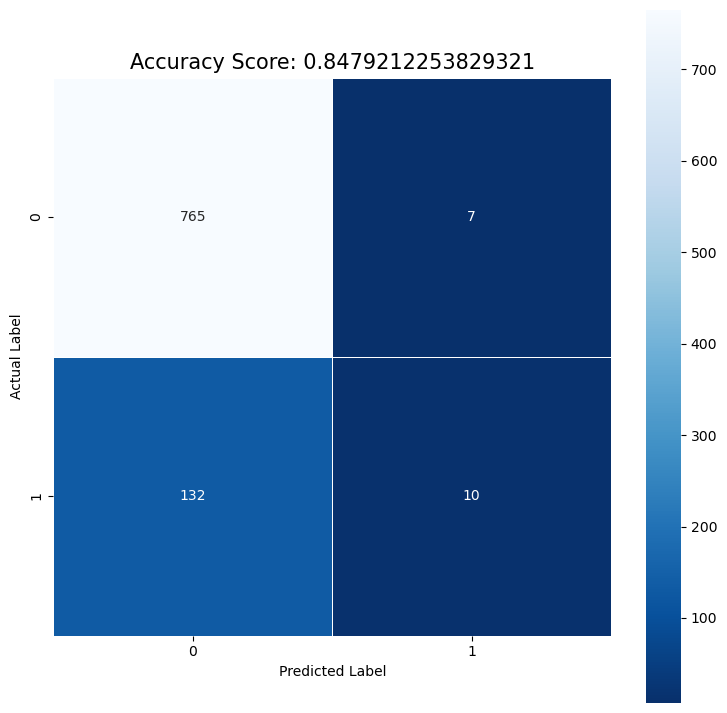

In [24]:
# make confusion matrix using seaborn heatmap
# true positive is 10, true negative is 765
# false positive is 7, false negative is 132

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r") 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)